**Importing all libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error


***IMPORTING DATASETS AND PRE-PROCESSING***

In [2]:
holidays = pd.read_csv('holidays_events.csv')
transactions = pd.read_csv('transactions.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
oil = pd.read_csv('oil.csv')

In [3]:
holidays.info()
transactions.info()
stores.info()
train.info()
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ----

In [4]:
print("holidays")
print(holidays.head(5))

print("transactions")
print(transactions.head(5))

print("stores")
print(stores.head(5))

print("train")
print(train.head(5))

print("test")
print(test.head(5))

print("oil prices")
print(oil.head(5))

holidays
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
transactions
         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922
stores
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2

In [5]:
# Merge DataFrames
merged_df = pd.merge(train, stores, on='store_nbr') \
              .rename({'type': 'store_type'}, axis=1) \
              .merge(holidays.rename(columns={'type': 'holiday'}), on='date', how='left') \
              .merge(oil, on='date', how='left')

# Drop columns with all null values
merged_df = merged_df.dropna(axis=1, how='all')

# To confirm number of columns
print(merged_df.shape[1])


16


In [6]:
merged_df.sample(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday,locale,locale_name,description,transferred,dcoilwtico
2622434,2577884,2016-12-20,4,MAGAZINES,12.000,0,Quito,Pichincha,D,9,NaN,NaN,NaN,NaN,NaN,52.22
2176149,2147637,2016-04-23,18,PRODUCE,1906.933,1,Quito,Pichincha,B,16,Event,National,Ecuador,Terremoto Manabi+7,False,NaN
1989567,1962837,2016-01-10,32,PRODUCE,260.428,0,Guayaquil,Guayas,C,3,NaN,NaN,NaN,NaN,NaN,NaN
2327983,2286997,2016-07-10,28,SCHOOL AND OFFICE SUPPLIES,6.000,0,Guayaquil,Guayas,E,10,NaN,NaN,NaN,NaN,NaN,NaN
2133821,2107091,2016-03-31,30,DAIRY,235.000,0,Guayaquil,Guayas,C,3,NaN,NaN,NaN,NaN,NaN,36.94


In [7]:
merged_df.describe

<bound method NDFrame.describe of               id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3054343  3000883  2017-08-15          9                     POULTRY   438.133   
3054344  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3054345  3000885  2017-08-15          9                     PRODUCE  2419.729   
3054346  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3054347  3000887  2017-08-15          9                     SEAFOOD    16.0

In [8]:
merged_df.isna().sum().count

<bound method Series.count of id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
store_type           0
cluster              0
holiday        2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dcoilwtico      955152
dtype: int64>

In [9]:
merged_df.isna().sum().count
merged_df['dcoilwtico'] = merged_df['dcoilwtico'].ffill().bfill()

In [10]:
merged_df.shape

(3054348, 16)

In [11]:
merged_df.isna().sum().count

<bound method Series.count of id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
store_type           0
cluster              0
holiday        2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dcoilwtico           0
dtype: int64>

In [12]:

# Step 1: Change 'type' to 'Holiday' where 'transferred' is True and 'type' is NaN or null
merged_df.loc[(merged_df['transferred'] == True) & (merged_df['holiday'].isna()), 'holiday'] = 'Holiday'

# Step 2: Change 'type' column to 1 for 'Holiday' and 0 otherwise
merged_df['holiday'] = np.where(merged_df['holiday'] == 'Holiday', 1, 0)

In [13]:
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,1,National,Ecuador,Primer dia del ano,False,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,1,National,Ecuador,Primer dia del ano,False,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,1,National,Ecuador,Primer dia del ano,False,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,1,National,Ecuador,Primer dia del ano,False,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,1,National,Ecuador,Primer dia del ano,False,93.14


In [14]:
# deleting transferred column 
merged_df = merged_df.drop(columns=['transferred'])
merged_df = merged_df.drop(columns=['locale_name'])
merged_df = merged_df.drop(columns=['description'])
merged_df = merged_df.drop(columns=['state'])

In [15]:
merged_df.sample(5)

,id,date,store_nbr,family,sales,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico
1076028,1059990,2014-08-19,5,PRODUCE,1.0,0,Santo Domingo,D,4,0,NaN,94.35
473010,465882,2013-09-19,30,LINGERIE,7.0,0,Guayaquil,C,3,0,NaN,106.26
3043202,2989742,2017-08-09,46,DAIRY,1158.0,24,Quito,A,14,0,NaN,49.59
2332882,2291896,2016-07-13,16,GROCERY II,1.0,0,Santo Domingo,C,3,0,NaN,44.87
1245915,1229877,2014-11-23,18,AUTOMOTIVE,6.0,0,Quito,B,16,0,NaN,76.52


In [16]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate month, year, and week
merged_df['month'] = merged_df['date'].dt.month
merged_df['year'] = merged_df['date'].dt.year
merged_df['week'] = merged_df['date'].dt.isocalendar().week


In [17]:
merged_df.sample(5)

,id,date,store_nbr,family,sales,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week
980628,966372,2014-06-28,24,AUTOMOTIVE,0.0,0,Guayaquil,D,1,0,National,106.46,6,2014,26
2030064,2003334,2016-02-02,2,BEVERAGES,3053.0,29,Quito,D,13,0,NaN,29.90,2,2016,5
504897,497769,2013-10-07,25,PRODUCE,5.0,0,Salinas,D,1,1,Local,103.07,10,2013,41
2447755,2404987,2016-09-14,39,GROCERY II,25.0,0,Cuenca,B,6,0,NaN,43.62,9,2016,37
13035,13035,2013-01-08,25,AUTOMOTIVE,0.0,0,Salinas,D,1,0,NaN,93.21,1,2013,2


In [18]:
merged_df['locale'].unique()

array(['National', nan, 'Local', 'Regional'], dtype=object)

In [19]:
# Map the 'locale' values to integers
locale_mapping = {'National': 3, 'Local': 1, 'Regional': 2, np.nan: 0}

# Replace the 'locale' column with the mapped values
merged_df['locale'] = merged_df['locale'].map(locale_mapping).fillna(0).astype(int)


In [20]:
merged_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [21]:
merged_df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week
192627,192627,2013-04-19,14,CELEBRATION,0.000,0,Riobamba,C,7,0,0,88.04,4,2013,16
1660475,1635527,2015-07-09,49,HARDWARE,1.000,0,Quito,A,11,0,0,52.76,7,2015,28
2107063,2080333,2016-03-16,3,GROCERY II,73.000,0,Quito,D,8,0,0,38.43,3,2016,11
2757020,2710688,2017-03-06,17,BEAUTY,1.000,0,Quito,C,12,0,0,53.19,3,2017,10
309980,308198,2013-06-22,7,FROZEN FOODS,340.000,0,Quito,D,8,0,0,93.81,6,2013,25
331566,326163,2013-07-03,10,MEATS,221.811,0,Quito,C,15,1,1,101.92,7,2013,27
869249,860339,2014-04-29,48,PREPARED FOODS,64.014,0,Quito,A,14,0,0,101.56,4,2014,18
329497,324151,2013-07-01,53,PERSONAL CARE,0.000,0,Manta,D,13,0,0,97.94,7,2013,27
97252,97252,2013-02-24,38,BABY CARE,0.000,0,Loja,D,4,0,0,93.12,2,2013,8
1227432,1211394,2014-11-12,48,PRODUCE,2094.329,167,Quito,A,14,1,1,77.16,11,2014,46


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   store_type   object        
 8   cluster      int64         
 9   holiday      int32         
 10  locale       int32         
 11  dcoilwtico   float64       
 12  month        int32         
 13  year         int32         
 14  week         UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(4), int64(4), object(3)
memory usage: 294.2+ MB


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to the categorical columns
merged_df['family'] = le.fit_transform(merged_df['family'])
merged_df['city'] = le.fit_transform(merged_df['city'])
merged_df['store_type'] = le.fit_transform(merged_df['store_type'])

In [24]:
merged_df.shape

(3054348, 15)

In [25]:
merged_df.sample(15)

,id,date,store_nbr,family,sales,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week
623851,616723,2013-12-13,13,19,0.000,0,10,2,15,0,0,96.27,12,2013,50
102517,102517,2013-02-27,35,19,0.000,0,15,2,3,0,0,92.84,2,2013,9
2873060,2824946,2017-05-09,22,14,0.000,0,16,2,7,0,0,45.84,5,2017,19
2221048,2185408,2016-05-14,28,16,35.000,0,8,4,10,0,3,46.22,5,2016,19
353935,346807,2013-07-14,4,10,267.000,0,18,3,9,0,0,105.85,7,2013,28
1401185,1381583,2015-02-17,24,5,641.751,0,8,3,1,1,3,53.56,2,2015,8
914240,905330,2014-05-25,11,8,693.000,0,2,1,6,0,0,105.01,5,2014,21
483903,476775,2013-09-25,36,24,69.186,0,11,4,10,0,0,102.68,9,2013,39
1113420,1097382,2014-09-09,5,0,8.000,0,21,3,4,0,0,92.73,9,2014,37
2394023,2351255,2016-08-15,31,5,495.000,6,1,1,10,1,1,45.72,8,2016,33


In [26]:
merged_df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [27]:
!pip install optuna
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [27]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import warnings
from sklearn.preprocessing import LabelEncoder

In [29]:



# Ignore warnings
warnings.filterwarnings("ignore")

# Convert categorical columns to numeric
categorical_cols = ['store_nbr', 'family', 'city', 'store_type', 'cluster', 'locale']
for col in categorical_cols:
    lbl = LabelEncoder()
    merged_df[col] = lbl.fit_transform(merged_df[col].astype(str))

# Replace 'sales' with your target variable and drop columns not needed for training
X = merged_df.drop(columns=['sales', 'date'])  # Dropping 'sales' and 'date' columns
y = merged_df['sales']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define the hyperparameters to search over
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'verbose': -1
    }

    # Train the model with the given parameters
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)
    model = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[lgb.early_stopping(100)])
    
    # Predict and calculate the RMSE
    preds = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, preds, squared=False)

    return rmse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best parameters
best_params = study.best_params
print("Best parameters: ", best_params)


[I 2024-10-17 05:37:32,165] A new study created in memory with name: no-name-1d17ecc1-0cd0-4a24-9e64-8f28a0cba5c3


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 476.629


[I 2024-10-17 05:37:36,287] Trial 0 finished with value: 476.6289591945021 and parameters: {'learning_rate': 0.06252769620835796, 'feature_fraction': 0.8861046241245757, 'bagging_fraction': 0.8891464145033108, 'bagging_freq': 10, 'num_leaves': 16, 'min_data_in_leaf': 67, 'lambda_l1': 0.06253012736379333, 'lambda_l2': 0.00037211372712226255}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 612.14


[I 2024-10-17 05:37:40,376] Trial 1 finished with value: 612.1403158604203 and parameters: {'learning_rate': 0.021202605697311354, 'feature_fraction': 0.7837942002531743, 'bagging_fraction': 0.7622546561467847, 'bagging_freq': 6, 'num_leaves': 16, 'min_data_in_leaf': 92, 'lambda_l1': 0.00029501479748190643, 'lambda_l2': 1.5716233025266757e-06}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 978.333


[I 2024-10-17 05:37:44,613] Trial 2 finished with value: 978.3332209095382 and parameters: {'learning_rate': 0.0022318138791268052, 'feature_fraction': 0.8322210069288183, 'bagging_fraction': 0.5553508955620905, 'bagging_freq': 5, 'num_leaves': 18, 'min_data_in_leaf': 17, 'lambda_l1': 0.4553468648495594, 'lambda_l2': 2.701563364159618e-05}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 950.334


[I 2024-10-17 05:37:49,863] Trial 3 finished with value: 950.3341488197715 and parameters: {'learning_rate': 0.002991356348845542, 'feature_fraction': 0.5759934660944518, 'bagging_fraction': 0.858691732358742, 'bagging_freq': 4, 'num_leaves': 32, 'min_data_in_leaf': 74, 'lambda_l1': 3.707893109521524e-08, 'lambda_l2': 3.3981541403908007}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 972.345


[I 2024-10-17 05:37:56,157] Trial 4 finished with value: 972.3452007836574 and parameters: {'learning_rate': 0.0017719525105305877, 'feature_fraction': 0.7570986074464888, 'bagging_fraction': 0.7051018792711525, 'bagging_freq': 2, 'num_leaves': 88, 'min_data_in_leaf': 77, 'lambda_l1': 3.8635150607162714e-07, 'lambda_l2': 9.382197010552724e-06}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 895.104


[I 2024-10-17 05:38:02,168] Trial 5 finished with value: 895.1039711324553 and parameters: {'learning_rate': 0.003347363073251852, 'feature_fraction': 0.6888741613637734, 'bagging_fraction': 0.8389696863195346, 'bagging_freq': 1, 'num_leaves': 77, 'min_data_in_leaf': 86, 'lambda_l1': 0.0005775112252588238, 'lambda_l2': 9.48485747077266e-07}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 694.065


[I 2024-10-17 05:38:08,534] Trial 6 finished with value: 694.0649079410356 and parameters: {'learning_rate': 0.011840629935879799, 'feature_fraction': 0.644183309563605, 'bagging_fraction': 0.9201958491509533, 'bagging_freq': 3, 'num_leaves': 24, 'min_data_in_leaf': 10, 'lambda_l1': 0.021874497900102347, 'lambda_l2': 2.635052701253712e-05}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 512.639


[I 2024-10-17 05:38:14,938] Trial 7 finished with value: 512.6390060444553 and parameters: {'learning_rate': 0.021547053398910193, 'feature_fraction': 0.6964977840461632, 'bagging_fraction': 0.8587997918536128, 'bagging_freq': 10, 'num_leaves': 46, 'min_data_in_leaf': 89, 'lambda_l1': 0.023601107109426714, 'lambda_l2': 0.0218991834889026}. Best is trial 0 with value: 476.6289591945021.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 395.829


[I 2024-10-17 05:38:21,235] Trial 8 finished with value: 395.8285785979061 and parameters: {'learning_rate': 0.09876753431040537, 'feature_fraction': 0.52986256534517, 'bagging_fraction': 0.8983395594692336, 'bagging_freq': 6, 'num_leaves': 46, 'min_data_in_leaf': 58, 'lambda_l1': 0.00010375589355755045, 'lambda_l2': 3.123114316411412}. Best is trial 8 with value: 395.8285785979061.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 523.966


[I 2024-10-17 05:38:26,620] Trial 9 finished with value: 523.9656977618797 and parameters: {'learning_rate': 0.03116659130207565, 'feature_fraction': 0.5863296273903649, 'bagging_fraction': 0.7691691044242169, 'bagging_freq': 10, 'num_leaves': 23, 'min_data_in_leaf': 41, 'lambda_l1': 2.0734703452011814e-06, 'lambda_l2': 2.745124359839016e-08}. Best is trial 8 with value: 395.8285785979061.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 408.451


[I 2024-10-17 05:38:32,233] Trial 10 finished with value: 408.45067446470694 and parameters: {'learning_rate': 0.0982340764430496, 'feature_fraction': 0.4153985273289613, 'bagging_fraction': 0.5394153539303239, 'bagging_freq': 7, 'num_leaves': 62, 'min_data_in_leaf': 47, 'lambda_l1': 8.842986424756002e-05, 'lambda_l2': 4.91019512474449}. Best is trial 8 with value: 395.8285785979061.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 414.199


[I 2024-10-17 05:38:37,493] Trial 11 finished with value: 414.19934100894517 and parameters: {'learning_rate': 0.08994171829130312, 'feature_fraction': 0.4201677079331698, 'bagging_fraction': 0.40710330527994243, 'bagging_freq': 7, 'num_leaves': 63, 'min_data_in_leaf': 46, 'lambda_l1': 3.718274448760418e-05, 'lambda_l2': 7.089558877877401}. Best is trial 8 with value: 395.8285785979061.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 433.836


[I 2024-10-17 05:38:42,914] Trial 12 finished with value: 433.83574762470204 and parameters: {'learning_rate': 0.0502715087612522, 'feature_fraction': 0.42941625173572995, 'bagging_fraction': 0.5908942125194124, 'bagging_freq': 8, 'num_leaves': 53, 'min_data_in_leaf': 55, 'lambda_l1': 4.513849492207239e-05, 'lambda_l2': 0.2603327182957847}. Best is trial 8 with value: 395.8285785979061.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 784.189


[I 2024-10-17 05:38:50,579] Trial 13 finished with value: 784.1889613028133 and parameters: {'learning_rate': 0.00689531972130162, 'feature_fraction': 0.5011989817176223, 'bagging_fraction': 0.9949887707378977, 'bagging_freq': 8, 'num_leaves': 67, 'min_data_in_leaf': 35, 'lambda_l1': 0.0016641287069410788, 'lambda_l2': 0.02457898047506703}. Best is trial 8 with value: 395.8285785979061.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 387.058


[I 2024-10-17 05:38:55,390] Trial 14 finished with value: 387.0575834494331 and parameters: {'learning_rate': 0.0992543418421471, 'feature_fraction': 0.9745926073458684, 'bagging_fraction': 0.5628560901238313, 'bagging_freq': 6, 'num_leaves': 42, 'min_data_in_leaf': 59, 'lambda_l1': 5.117619731303197e-06, 'lambda_l2': 0.23171868176787017}. Best is trial 14 with value: 387.0575834494331.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 449.931


[I 2024-10-17 05:39:00,744] Trial 15 finished with value: 449.93132281970594 and parameters: {'learning_rate': 0.039066663247646495, 'feature_fraction': 0.9783493026472228, 'bagging_fraction': 0.6192856966532686, 'bagging_freq': 5, 'num_leaves': 38, 'min_data_in_leaf': 58, 'lambda_l1': 4.533120142418041e-06, 'lambda_l2': 0.003082229804749469}. Best is trial 14 with value: 387.0575834494331.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1013.66


[I 2024-10-17 05:39:05,721] Trial 16 finished with value: 1013.6561164547329 and parameters: {'learning_rate': 0.00111418840399438, 'feature_fraction': 0.954506486218701, 'bagging_fraction': 0.4459582094073525, 'bagging_freq': 4, 'num_leaves': 43, 'min_data_in_leaf': 30, 'lambda_l1': 2.5516492309743574e-08, 'lambda_l2': 0.23204496792038903}. Best is trial 14 with value: 387.0575834494331.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 677.726


[I 2024-10-17 05:39:11,813] Trial 17 finished with value: 677.7258214875279 and parameters: {'learning_rate': 0.010115878560367483, 'feature_fraction': 0.5074810337799128, 'bagging_fraction': 0.4858950286549779, 'bagging_freq': 6, 'num_leaves': 100, 'min_data_in_leaf': 59, 'lambda_l1': 4.1797687791072144, 'lambda_l2': 0.27097383722056817}. Best is trial 14 with value: 387.0575834494331.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 391.432


[I 2024-10-17 05:39:17,311] Trial 18 finished with value: 391.432180262132 and parameters: {'learning_rate': 0.06855467253819067, 'feature_fraction': 0.8979747552341244, 'bagging_fraction': 0.6548284850988819, 'bagging_freq': 8, 'num_leaves': 52, 'min_data_in_leaf': 67, 'lambda_l1': 2.909164034466309e-06, 'lambda_l2': 0.003780036688105086}. Best is trial 14 with value: 387.0575834494331.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 455.674


[I 2024-10-17 05:39:23,356] Trial 19 finished with value: 455.67442963367756 and parameters: {'learning_rate': 0.023192217986184007, 'feature_fraction': 0.9070644110546555, 'bagging_fraction': 0.6294648057696646, 'bagging_freq': 8, 'num_leaves': 75, 'min_data_in_leaf': 100, 'lambda_l1': 3.513234447170764e-07, 'lambda_l2': 0.0008320654202456341}. Best is trial 14 with value: 387.0575834494331.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 433.816


[I 2024-10-17 05:39:28,425] Trial 20 finished with value: 433.8158104633724 and parameters: {'learning_rate': 0.05556731039730224, 'feature_fraction': 0.8775018595224542, 'bagging_fraction': 0.6753178034169616, 'bagging_freq': 9, 'num_leaves': 33, 'min_data_in_leaf': 70, 'lambda_l1': 2.765535790585839e-06, 'lambda_l2': 0.009390624956055188}. Best is trial 14 with value: 387.0575834494331.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 377.605


[I 2024-10-17 05:39:33,989] Trial 21 finished with value: 377.60501474132445 and parameters: {'learning_rate': 0.09663712557248623, 'feature_fraction': 0.9950260157292921, 'bagging_fraction': 0.7156669978957094, 'bagging_freq': 7, 'num_leaves': 51, 'min_data_in_leaf': 64, 'lambda_l1': 8.427259049649674e-06, 'lambda_l2': 0.409479875999728}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 393.416


[I 2024-10-17 05:39:39,862] Trial 22 finished with value: 393.41627361891386 and parameters: {'learning_rate': 0.06425229372508233, 'feature_fraction': 0.9886959514459337, 'bagging_fraction': 0.7009148145294563, 'bagging_freq': 7, 'num_leaves': 54, 'min_data_in_leaf': 80, 'lambda_l1': 2.2671757222729043e-07, 'lambda_l2': 0.11428962627064083}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 435.02


[I 2024-10-17 05:39:45,836] Trial 23 finished with value: 435.0203548714103 and parameters: {'learning_rate': 0.035131049421402986, 'feature_fraction': 0.931746998912426, 'bagging_fraction': 0.75389196195239, 'bagging_freq': 9, 'num_leaves': 53, 'min_data_in_leaf': 67, 'lambda_l1': 1.4229268404816238e-05, 'lambda_l2': 0.002648834746476208}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 406.524


[I 2024-10-17 05:39:50,631] Trial 24 finished with value: 406.5241413009902 and parameters: {'learning_rate': 0.07220553091717512, 'feature_fraction': 0.8441793255042827, 'bagging_fraction': 0.519842346795843, 'bagging_freq': 7, 'num_leaves': 40, 'min_data_in_leaf': 64, 'lambda_l1': 1.3014794077430748e-06, 'lambda_l2': 0.582204134226299}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 532.53


[I 2024-10-17 05:39:56,290] Trial 25 finished with value: 532.5303668963663 and parameters: {'learning_rate': 0.01563606774690497, 'feature_fraction': 0.9456635850895124, 'bagging_fraction': 0.6179447130999927, 'bagging_freq': 9, 'num_leaves': 61, 'min_data_in_leaf': 48, 'lambda_l1': 1.010889339303469e-05, 'lambda_l2': 0.08424856884278814}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 763.195


[I 2024-10-17 05:40:02,535] Trial 26 finished with value: 763.1948607183681 and parameters: {'learning_rate': 0.005335875676683235, 'feature_fraction': 0.9959940252715971, 'bagging_fraction': 0.6602018102705818, 'bagging_freq': 5, 'num_leaves': 72, 'min_data_in_leaf': 81, 'lambda_l1': 0.0022052162676323445, 'lambda_l2': 0.006874272505734583}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 459.866


[I 2024-10-17 05:40:07,383] Trial 27 finished with value: 459.8664127818859 and parameters: {'learning_rate': 0.042710711771961105, 'feature_fraction': 0.782519479455825, 'bagging_fraction': 0.5765586493645467, 'bagging_freq': 8, 'num_leaves': 29, 'min_data_in_leaf': 53, 'lambda_l1': 7.619730891808277e-08, 'lambda_l2': 1.1424815721172445}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 389.982


[I 2024-10-17 05:40:13,362] Trial 28 finished with value: 389.9817274774453 and parameters: {'learning_rate': 0.07675109699352815, 'feature_fraction': 0.8365170691505475, 'bagging_fraction': 0.7959640259644595, 'bagging_freq': 4, 'num_leaves': 49, 'min_data_in_leaf': 64, 'lambda_l1': 1.0574187096924772e-06, 'lambda_l2': 0.02693563014853432}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 462.976


[I 2024-10-17 05:40:19,307] Trial 29 finished with value: 462.9764843454276 and parameters: {'learning_rate': 0.028533884017346967, 'feature_fraction': 0.8511723196313248, 'bagging_fraction': 0.7394882735592792, 'bagging_freq': 4, 'num_leaves': 46, 'min_data_in_leaf': 63, 'lambda_l1': 9.04248162790184e-07, 'lambda_l2': 0.00020426947688519285}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 414.486


[I 2024-10-17 05:40:25,796] Trial 30 finished with value: 414.4859072460873 and parameters: {'learning_rate': 0.07496778137124809, 'feature_fraction': 0.8025197934513828, 'bagging_fraction': 0.8006703415422058, 'bagging_freq': 3, 'num_leaves': 37, 'min_data_in_leaf': 73, 'lambda_l1': 1.416186579315529e-08, 'lambda_l2': 0.04259824006771339}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 393.768


[I 2024-10-17 05:40:32,538] Trial 31 finished with value: 393.768430891901 and parameters: {'learning_rate': 0.0677218910719241, 'feature_fraction': 0.8986302832396339, 'bagging_fraction': 0.8069336152487442, 'bagging_freq': 6, 'num_leaves': 50, 'min_data_in_leaf': 67, 'lambda_l1': 1.249825163597221e-05, 'lambda_l2': 0.00034843228022274185}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 409.337


[I 2024-10-17 05:40:40,021] Trial 32 finished with value: 409.3369745992004 and parameters: {'learning_rate': 0.044287698686212594, 'feature_fraction': 0.9231325768999664, 'bagging_fraction': 0.7280806749545616, 'bagging_freq': 7, 'num_leaves': 59, 'min_data_in_leaf': 53, 'lambda_l1': 1.0514675738937892e-07, 'lambda_l2': 1.144478183587284}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 403.178


[I 2024-10-17 05:40:46,773] Trial 33 finished with value: 403.1778932181193 and parameters: {'learning_rate': 0.057002934221148986, 'feature_fraction': 0.8814763629898575, 'bagging_fraction': 0.6582482122451133, 'bagging_freq': 5, 'num_leaves': 49, 'min_data_in_leaf': 71, 'lambda_l1': 5.929371216887657e-06, 'lambda_l2': 0.01258980844732457}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 483.527


[I 2024-10-17 05:40:50,643] Trial 34 finished with value: 483.5274054621325 and parameters: {'learning_rate': 0.08070283599008722, 'feature_fraction': 0.9621930625650682, 'bagging_fraction': 0.4987063248740538, 'bagging_freq': 6, 'num_leaves': 12, 'min_data_in_leaf': 63, 'lambda_l1': 8.387988713380936e-07, 'lambda_l2': 0.002421627567797918}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 399.93


[I 2024-10-17 05:40:57,908] Trial 35 finished with value: 399.9303916313731 and parameters: {'learning_rate': 0.05429183866799611, 'feature_fraction': 0.7384162511054985, 'bagging_fraction': 0.6824954779595778, 'bagging_freq': 3, 'num_leaves': 57, 'min_data_in_leaf': 78, 'lambda_l1': 0.00027414308099947326, 'lambda_l2': 0.07520919586761991}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 401.46


[I 2024-10-17 05:41:03,960] Trial 36 finished with value: 401.4601576977865 and parameters: {'learning_rate': 0.0982226918634816, 'feature_fraction': 0.831075995449182, 'bagging_fraction': 0.7920854478932884, 'bagging_freq': 4, 'num_leaves': 34, 'min_data_in_leaf': 42, 'lambda_l1': 2.406227531998811e-05, 'lambda_l2': 0.0006328995781183245}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 536.953


[I 2024-10-17 05:41:11,389] Trial 37 finished with value: 536.9531704119984 and parameters: {'learning_rate': 0.014979150153529179, 'feature_fraction': 0.9985517236769976, 'bagging_fraction': 0.7181148627871347, 'bagging_freq': 2, 'num_leaves': 68, 'min_data_in_leaf': 85, 'lambda_l1': 1.5422620767096495e-07, 'lambda_l2': 0.00010866216628168497}. Best is trial 21 with value: 377.60501474132445.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 369.933


[I 2024-10-17 05:41:17,661] Trial 38 finished with value: 369.9328233663024 and parameters: {'learning_rate': 0.07171563168397986, 'feature_fraction': 0.872120332034026, 'bagging_fraction': 0.5691523444256298, 'bagging_freq': 6, 'num_leaves': 81, 'min_data_in_leaf': 74, 'lambda_l1': 4.379251147948318e-07, 'lambda_l2': 1.5237316853660279}. Best is trial 38 with value: 369.9328233663024.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 423.509


[I 2024-10-17 05:41:24,400] Trial 39 finished with value: 423.50922902799704 and parameters: {'learning_rate': 0.02927568829478718, 'feature_fraction': 0.7440659173005749, 'bagging_fraction': 0.564657666539143, 'bagging_freq': 5, 'num_leaves': 87, 'min_data_in_leaf': 93, 'lambda_l1': 5.969272269658744e-07, 'lambda_l2': 1.2698048619499585}. Best is trial 38 with value: 369.9328233663024.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 386.665


[I 2024-10-17 05:41:32,096] Trial 40 finished with value: 386.6649200995034 and parameters: {'learning_rate': 0.047691012715917594, 'feature_fraction': 0.814331044373095, 'bagging_fraction': 0.8379576714344326, 'bagging_freq': 6, 'num_leaves': 82, 'min_data_in_leaf': 76, 'lambda_l1': 0.00017660630520796176, 'lambda_l2': 2.8534512516231696}. Best is trial 38 with value: 369.9328233663024.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 361.601


[I 2024-10-17 05:41:39,565] Trial 41 finished with value: 361.6014709016831 and parameters: {'learning_rate': 0.0769377481477858, 'feature_fraction': 0.815717922172596, 'bagging_fraction': 0.8839631008444561, 'bagging_freq': 6, 'num_leaves': 89, 'min_data_in_leaf': 77, 'lambda_l1': 0.0007104700139610102, 'lambda_l2': 1.6536268960868936}. Best is trial 41 with value: 361.6014709016831.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 387.544


[I 2024-10-17 05:41:47,994] Trial 42 finished with value: 387.54443966783396 and parameters: {'learning_rate': 0.04738614299505492, 'feature_fraction': 0.7963319311766648, 'bagging_fraction': 0.9963167200442513, 'bagging_freq': 6, 'num_leaves': 84, 'min_data_in_leaf': 75, 'lambda_l1': 0.003830056518265754, 'lambda_l2': 9.714777155884176}. Best is trial 41 with value: 361.6014709016831.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 353.168


[I 2024-10-17 05:41:55,769] Trial 43 finished with value: 353.16839789087913 and parameters: {'learning_rate': 0.08195274597026025, 'feature_fraction': 0.8704138756047674, 'bagging_fraction': 0.9397533059550501, 'bagging_freq': 6, 'num_leaves': 99, 'min_data_in_leaf': 83, 'lambda_l1': 0.0002587299621821155, 'lambda_l2': 3.0944297821523605}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 373.065


[I 2024-10-17 05:42:03,966] Trial 44 finished with value: 373.06492521226903 and parameters: {'learning_rate': 0.06031032243731706, 'feature_fraction': 0.7136181275791187, 'bagging_fraction': 0.9621674116915587, 'bagging_freq': 7, 'num_leaves': 97, 'min_data_in_leaf': 84, 'lambda_l1': 0.000291352084358725, 'lambda_l2': 2.632141920371365}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 372.016


[I 2024-10-17 05:42:12,461] Trial 45 finished with value: 372.0160197969446 and parameters: {'learning_rate': 0.06092035729907533, 'feature_fraction': 0.7224683741211798, 'bagging_fraction': 0.9526726910726862, 'bagging_freq': 7, 'num_leaves': 97, 'min_data_in_leaf': 94, 'lambda_l1': 0.0006798065190268322, 'lambda_l2': 0.7089854465660553}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 458.368


[I 2024-10-17 05:42:21,534] Trial 46 finished with value: 458.36818183473196 and parameters: {'learning_rate': 0.024316035328236202, 'feature_fraction': 0.6468613640977561, 'bagging_fraction': 0.9431540767987815, 'bagging_freq': 7, 'num_leaves': 97, 'min_data_in_leaf': 95, 'lambda_l1': 0.0007732252495197895, 'lambda_l2': 2.5020771178221195}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 404.488


[I 2024-10-17 05:42:30,319] Trial 47 finished with value: 404.4875701112654 and parameters: {'learning_rate': 0.03603182448595003, 'feature_fraction': 0.7192101224655287, 'bagging_fraction': 0.9504426516484519, 'bagging_freq': 5, 'num_leaves': 93, 'min_data_in_leaf': 86, 'lambda_l1': 0.009777461997171749, 'lambda_l2': 9.808552410330097e-07}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 517.586


[I 2024-10-17 05:42:38,893] Trial 48 finished with value: 517.5862498377552 and parameters: {'learning_rate': 0.016582731431237153, 'feature_fraction': 0.689229743516955, 'bagging_fraction': 0.8861539029751909, 'bagging_freq': 6, 'num_leaves': 92, 'min_data_in_leaf': 98, 'lambda_l1': 0.12921900809571724, 'lambda_l2': 0.7518919471662088}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 763.87


[I 2024-10-17 05:42:47,874] Trial 49 finished with value: 763.8697645534309 and parameters: {'learning_rate': 0.006701044684402148, 'feature_fraction': 0.6446487110368248, 'bagging_fraction': 0.9616240602754575, 'bagging_freq': 7, 'num_leaves': 93, 'min_data_in_leaf': 89, 'lambda_l1': 0.0006371455512543488, 'lambda_l2': 4.252965094538318}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 369.389


[I 2024-10-17 05:42:56,212] Trial 50 finished with value: 369.3885068537807 and parameters: {'learning_rate': 0.058887453823784304, 'feature_fraction': 0.7711526743709982, 'bagging_fraction': 0.9095285525891139, 'bagging_freq': 8, 'num_leaves': 98, 'min_data_in_leaf': 83, 'lambda_l1': 0.00793476555935401, 'lambda_l2': 3.6735607872934046e-06}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 372.181


[I 2024-10-17 05:43:04,723] Trial 51 finished with value: 372.18144861378613 and parameters: {'learning_rate': 0.05981190267945564, 'feature_fraction': 0.6697696002334501, 'bagging_fraction': 0.9132008778220065, 'bagging_freq': 8, 'num_leaves': 99, 'min_data_in_leaf': 83, 'lambda_l1': 0.006243737931498926, 'lambda_l2': 1.6109915910532466e-07}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 360.162


[I 2024-10-17 05:43:12,527] Trial 52 finished with value: 360.16157924796295 and parameters: {'learning_rate': 0.08382467767172351, 'feature_fraction': 0.7662381835094214, 'bagging_fraction': 0.9125786217514206, 'bagging_freq': 8, 'num_leaves': 90, 'min_data_in_leaf': 89, 'lambda_l1': 0.04587949707433889, 'lambda_l2': 5.253072483719529e-08}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 361.876


[I 2024-10-17 05:43:20,465] Trial 53 finished with value: 361.87602604115483 and parameters: {'learning_rate': 0.08143673891823323, 'feature_fraction': 0.7771516262635768, 'bagging_fraction': 0.8870245422249861, 'bagging_freq': 9, 'num_leaves': 90, 'min_data_in_leaf': 90, 'lambda_l1': 0.05384235397779486, 'lambda_l2': 1.2043757471168115e-05}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 362.974


[I 2024-10-17 05:43:27,758] Trial 54 finished with value: 362.9743014138148 and parameters: {'learning_rate': 0.08664758030611489, 'feature_fraction': 0.7751089954199687, 'bagging_fraction': 0.8737463829502284, 'bagging_freq': 10, 'num_leaves': 81, 'min_data_in_leaf': 90, 'lambda_l1': 0.08472775163184999, 'lambda_l2': 4.783331378528501e-06}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 363.412


[I 2024-10-17 05:43:35,072] Trial 55 finished with value: 363.4119534569249 and parameters: {'learning_rate': 0.0808071097227045, 'feature_fraction': 0.7764032800737634, 'bagging_fraction': 0.8782099635419002, 'bagging_freq': 10, 'num_leaves': 88, 'min_data_in_leaf': 90, 'lambda_l1': 0.06528139014934708, 'lambda_l2': 3.674394554137516e-06}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 362.019


[I 2024-10-17 05:43:42,377] Trial 56 finished with value: 362.0187022597753 and parameters: {'learning_rate': 0.08289207844657509, 'feature_fraction': 0.7611541590593337, 'bagging_fraction': 0.8752919796404378, 'bagging_freq': 10, 'num_leaves': 89, 'min_data_in_leaf': 89, 'lambda_l1': 0.3497659171220456, 'lambda_l2': 2.1981407366124295e-07}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 366.583


[I 2024-10-17 05:43:49,733] Trial 57 finished with value: 366.5827402634426 and parameters: {'learning_rate': 0.08551059759286384, 'feature_fraction': 0.7620081928644098, 'bagging_fraction': 0.8556076204712775, 'bagging_freq': 10, 'num_leaves': 78, 'min_data_in_leaf': 89, 'lambda_l1': 0.6413229712882228, 'lambda_l2': 1.3851975840035913e-08}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 354.59


[I 2024-10-17 05:43:57,200] Trial 58 finished with value: 354.59027633002756 and parameters: {'learning_rate': 0.0901404803657399, 'feature_fraction': 0.8165463952115184, 'bagging_fraction': 0.8247704894338973, 'bagging_freq': 9, 'num_leaves': 90, 'min_data_in_leaf': 97, 'lambda_l1': 0.708500206976503, 'lambda_l2': 1.7751376332599294e-07}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 971.151


[I 2024-10-17 05:44:07,059] Trial 59 finished with value: 971.1507136195725 and parameters: {'learning_rate': 0.0017913542016948735, 'feature_fraction': 0.8029777293513057, 'bagging_fraction': 0.8413420471879863, 'bagging_freq': 9, 'num_leaves': 90, 'min_data_in_leaf': 97, 'lambda_l1': 1.0594142997132359, 'lambda_l2': 1.7814017335096138e-07}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 394.421


[I 2024-10-17 05:44:15,357] Trial 60 finished with value: 394.42078630860715 and parameters: {'learning_rate': 0.038913136432156, 'feature_fraction': 0.8627189909357832, 'bagging_fraction': 0.9222486184898522, 'bagging_freq': 9, 'num_leaves': 86, 'min_data_in_leaf': 100, 'lambda_l1': 5.538311334363135, 'lambda_l2': 1.0533474987100839e-07}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 354.91


[I 2024-10-17 05:44:22,863] Trial 61 finished with value: 354.90974937416405 and parameters: {'learning_rate': 0.08927662094847258, 'feature_fraction': 0.8222505529013234, 'bagging_fraction': 0.8787969525939747, 'bagging_freq': 10, 'num_leaves': 90, 'min_data_in_leaf': 90, 'lambda_l1': 0.21209007303817345, 'lambda_l2': 3.8886643250638027e-07}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 353.911


[I 2024-10-17 05:44:30,447] Trial 62 finished with value: 353.91050061858755 and parameters: {'learning_rate': 0.08979318508480742, 'feature_fraction': 0.8156620512111777, 'bagging_fraction': 0.821179678797241, 'bagging_freq': 9, 'num_leaves': 94, 'min_data_in_leaf': 87, 'lambda_l1': 0.20771270755876553, 'lambda_l2': 5.419666168309691e-08}. Best is trial 43 with value: 353.16839789087913.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 352.567


[I 2024-10-17 05:44:37,918] Trial 63 finished with value: 352.56666086488923 and parameters: {'learning_rate': 0.09051207604772762, 'feature_fraction': 0.8216363827534651, 'bagging_fraction': 0.8234298655404958, 'bagging_freq': 9, 'num_leaves': 94, 'min_data_in_leaf': 96, 'lambda_l1': 0.02327166612620309, 'lambda_l2': 5.3630238411965135e-08}. Best is trial 63 with value: 352.56666086488923.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 350.371


[I 2024-10-17 05:44:45,367] Trial 64 finished with value: 350.37125851105753 and parameters: {'learning_rate': 0.09420915333511908, 'feature_fraction': 0.8176531130858163, 'bagging_fraction': 0.8223560071979477, 'bagging_freq': 9, 'num_leaves': 94, 'min_data_in_leaf': 80, 'lambda_l1': 2.5504575426843594, 'lambda_l2': 6.768113255319826e-08}. Best is trial 64 with value: 350.37125851105753.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 350.267


[I 2024-10-17 05:44:52,788] Trial 65 finished with value: 350.26734682620554 and parameters: {'learning_rate': 0.09844049389324067, 'feature_fraction': 0.8466357919708261, 'bagging_fraction': 0.8318178914878728, 'bagging_freq': 9, 'num_leaves': 94, 'min_data_in_leaf': 96, 'lambda_l1': 2.1504977952071807, 'lambda_l2': 5.187425091773985e-08}. Best is trial 65 with value: 350.26734682620554.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 350.557


[I 2024-10-17 05:45:00,056] Trial 66 finished with value: 350.5572603563005 and parameters: {'learning_rate': 0.09975014009998857, 'feature_fraction': 0.8243637029090649, 'bagging_fraction': 0.8115100417766341, 'bagging_freq': 9, 'num_leaves': 93, 'min_data_in_leaf': 96, 'lambda_l1': 1.8142236448266533, 'lambda_l2': 3.595127655469843e-07}. Best is trial 65 with value: 350.26734682620554.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 350.907


[I 2024-10-17 05:45:07,482] Trial 67 finished with value: 350.90650489662767 and parameters: {'learning_rate': 0.09928309507564008, 'feature_fraction': 0.8535037579906609, 'bagging_fraction': 0.8217284302846715, 'bagging_freq': 9, 'num_leaves': 95, 'min_data_in_leaf': 97, 'lambda_l1': 2.5656681017267506, 'lambda_l2': 1.0197599641399238e-08}. Best is trial 65 with value: 350.26734682620554.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 893.886


[I 2024-10-17 05:45:15,165] Trial 68 finished with value: 893.8858416510957 and parameters: {'learning_rate': 0.002918140124401021, 'feature_fraction': 0.850938241091864, 'bagging_fraction': 0.771759375358251, 'bagging_freq': 9, 'num_leaves': 95, 'min_data_in_leaf': 95, 'lambda_l1': 2.3096605771175907, 'lambda_l2': 3.7331843597526276e-08}. Best is trial 65 with value: 350.26734682620554.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 342.506


[I 2024-10-17 05:45:22,339] Trial 69 finished with value: 342.5060600580794 and parameters: {'learning_rate': 0.09955793216529635, 'feature_fraction': 0.904943398344279, 'bagging_fraction': 0.7789275636329233, 'bagging_freq': 9, 'num_leaves': 100, 'min_data_in_leaf': 26, 'lambda_l1': 2.5401550572693536, 'lambda_l2': 1.2165191279503998e-08}. Best is trial 69 with value: 342.5060600580794.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 342.323


[I 2024-10-17 05:45:29,396] Trial 70 finished with value: 342.32309177673466 and parameters: {'learning_rate': 0.09997737870406112, 'feature_fraction': 0.9242898115856535, 'bagging_fraction': 0.7718577928077195, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 34, 'lambda_l1': 9.376833188748934, 'lambda_l2': 1.0988835021185332e-08}. Best is trial 70 with value: 342.32309177673466.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 345.362


[I 2024-10-17 05:45:36,340] Trial 71 finished with value: 345.3620268963975 and parameters: {'learning_rate': 0.0987417620308687, 'feature_fraction': 0.9263531378989629, 'bagging_fraction': 0.7699826203599389, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 23, 'lambda_l1': 9.704485112320466, 'lambda_l2': 1.2217542873454143e-08}. Best is trial 70 with value: 342.32309177673466.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 342.52


[I 2024-10-17 05:45:43,345] Trial 72 finished with value: 342.51974242094656 and parameters: {'learning_rate': 0.0966484385113572, 'feature_fraction': 0.9228776555307802, 'bagging_fraction': 0.7631052405847306, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 22, 'lambda_l1': 9.989247640464336, 'lambda_l2': 1.074504326479852e-08}. Best is trial 70 with value: 342.32309177673466.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 341.087


[I 2024-10-17 05:45:50,590] Trial 73 finished with value: 341.08709811299826 and parameters: {'learning_rate': 0.09991934535671193, 'feature_fraction': 0.9194354910405196, 'bagging_fraction': 0.7701316135440953, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 22, 'lambda_l1': 2.468383219605348, 'lambda_l2': 1.3755460854779887e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 359.053


[I 2024-10-17 05:45:58,280] Trial 74 finished with value: 359.05334786158045 and parameters: {'learning_rate': 0.06832514955095127, 'feature_fraction': 0.9093478324960916, 'bagging_fraction': 0.774250642170706, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 21, 'lambda_l1': 8.086994211513451, 'lambda_l2': 1.9550125344664228e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 358.672


[I 2024-10-17 05:46:06,067] Trial 75 finished with value: 358.6723101305863 and parameters: {'learning_rate': 0.06833358393399065, 'feature_fraction': 0.9368068084661966, 'bagging_fraction': 0.7525390019256567, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 24, 'lambda_l1': 9.911205006779184, 'lambda_l2': 2.3293505987704746e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 372.806


[I 2024-10-17 05:46:13,989] Trial 76 finished with value: 372.8063852530941 and parameters: {'learning_rate': 0.05369097380715517, 'feature_fraction': 0.9197433265255629, 'bagging_fraction': 0.7824359622001502, 'bagging_freq': 8, 'num_leaves': 96, 'min_data_in_leaf': 12, 'lambda_l1': 1.6885345357333803, 'lambda_l2': 1.107929690387829e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 352.677


[I 2024-10-17 05:46:20,807] Trial 77 finished with value: 352.6774971144668 and parameters: {'learning_rate': 0.09824681003337753, 'feature_fraction': 0.9622530710257777, 'bagging_fraction': 0.7408878912924681, 'bagging_freq': 8, 'num_leaves': 85, 'min_data_in_leaf': 32, 'lambda_l1': 4.844419482193206, 'lambda_l2': 4.812039503030726e-07}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 357.839


[I 2024-10-17 05:46:28,409] Trial 78 finished with value: 357.8389109124151 and parameters: {'learning_rate': 0.07015739606738322, 'feature_fraction': 0.9025656301726247, 'bagging_fraction': 0.7617652861250052, 'bagging_freq': 9, 'num_leaves': 100, 'min_data_in_leaf': 25, 'lambda_l1': 1.300259238963928, 'lambda_l2': 9.832664377896697e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 360.327


[I 2024-10-17 05:46:36,417] Trial 79 finished with value: 360.32679593252726 and parameters: {'learning_rate': 0.0726358346733406, 'feature_fraction': 0.889706169008477, 'bagging_fraction': 0.7879602223531931, 'bagging_freq': 8, 'num_leaves': 92, 'min_data_in_leaf': 20, 'lambda_l1': 3.3416559716946304, 'lambda_l2': 2.8035191738564013e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 374.364


[I 2024-10-17 05:46:44,037] Trial 80 finished with value: 374.3642226683179 and parameters: {'learning_rate': 0.05182027905914805, 'feature_fraction': 0.9350734897166468, 'bagging_fraction': 0.689003281791426, 'bagging_freq': 9, 'num_leaves': 96, 'min_data_in_leaf': 28, 'lambda_l1': 5.869195163243976, 'lambda_l2': 1.6445230576495458e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 346.716


[I 2024-10-17 05:46:51,847] Trial 81 finished with value: 346.7162458697687 and parameters: {'learning_rate': 0.09796461651578431, 'feature_fraction': 0.9735738132134956, 'bagging_fraction': 0.8082761007509264, 'bagging_freq': 9, 'num_leaves': 96, 'min_data_in_leaf': 36, 'lambda_l1': 2.5451075317292062, 'lambda_l2': 1.0039877201709835e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 344.418


[I 2024-10-17 05:46:59,234] Trial 82 finished with value: 344.41795589998327 and parameters: {'learning_rate': 0.09732267823820748, 'feature_fraction': 0.9563804507470147, 'bagging_fraction': 0.8023524425673106, 'bagging_freq': 10, 'num_leaves': 97, 'min_data_in_leaf': 37, 'lambda_l1': 2.0471392593487003, 'lambda_l2': 7.651960564347503e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 362.555


[I 2024-10-17 05:47:06,890] Trial 83 finished with value: 362.5545637328768 and parameters: {'learning_rate': 0.06651028252926496, 'feature_fraction': 0.9713217289595111, 'bagging_fraction': 0.7396427107079453, 'bagging_freq': 10, 'num_leaves': 98, 'min_data_in_leaf': 37, 'lambda_l1': 0.9436844436270925, 'lambda_l2': 3.5671479817403086e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 356.02


[I 2024-10-17 05:47:14,515] Trial 84 finished with value: 356.0196683116661 and parameters: {'learning_rate': 0.07520660466360196, 'feature_fraction': 0.9531766142112997, 'bagging_fraction': 0.8050092002665395, 'bagging_freq': 10, 'num_leaves': 96, 'min_data_in_leaf': 16, 'lambda_l1': 2.9806059069844815, 'lambda_l2': 7.75148628896118e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 343.636


[I 2024-10-17 05:47:22,184] Trial 85 finished with value: 343.6362762213605 and parameters: {'learning_rate': 0.0997166206174753, 'feature_fraction': 0.9176644800151313, 'bagging_fraction': 0.8470836026607682, 'bagging_freq': 8, 'num_leaves': 98, 'min_data_in_leaf': 33, 'lambda_l1': 0.4808054224765245, 'lambda_l2': 1.9737623764277428e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 364.14


[I 2024-10-17 05:47:30,435] Trial 86 finished with value: 364.1399896008448 and parameters: {'learning_rate': 0.06142075205655269, 'feature_fraction': 0.9176834871229452, 'bagging_fraction': 0.8467719164431216, 'bagging_freq': 8, 'num_leaves': 98, 'min_data_in_leaf': 34, 'lambda_l1': 0.4784811529111997, 'lambda_l2': 1.952110803537018e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 355.753


[I 2024-10-17 05:47:37,763] Trial 87 finished with value: 355.7525488469104 and parameters: {'learning_rate': 0.0770143696678591, 'feature_fraction': 0.9802399674737442, 'bagging_fraction': 0.7211600933258525, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 29, 'lambda_l1': 9.363455758360026, 'lambda_l2': 3.495472183069051e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 999.4


[I 2024-10-17 05:47:45,436] Trial 88 finished with value: 999.3996307867088 and parameters: {'learning_rate': 0.0012014796058338038, 'feature_fraction': 0.9450112879335981, 'bagging_fraction': 0.7552485055767065, 'bagging_freq': 8, 'num_leaves': 92, 'min_data_in_leaf': 39, 'lambda_l1': 4.302424699006516, 'lambda_l2': 1.1880656609350963e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 362.826


[I 2024-10-17 05:47:53,459] Trial 89 finished with value: 362.825904601295 and parameters: {'learning_rate': 0.06443191228909696, 'feature_fraction': 0.890037158800466, 'bagging_fraction': 0.7914652509684215, 'bagging_freq': 7, 'num_leaves': 97, 'min_data_in_leaf': 26, 'lambda_l1': 0.3271113082442208, 'lambda_l2': 2.4447630816833694e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 377.426


[I 2024-10-17 05:48:01,851] Trial 90 finished with value: 377.42618265855043 and parameters: {'learning_rate': 0.04671271912804671, 'feature_fraction': 0.9267769240914149, 'bagging_fraction': 0.861367734566987, 'bagging_freq': 10, 'num_leaves': 100, 'min_data_in_leaf': 42, 'lambda_l1': 1.1246237469560203, 'lambda_l2': 1.0116605311131023e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 349.592


[I 2024-10-17 05:48:09,182] Trial 91 finished with value: 349.59211491907496 and parameters: {'learning_rate': 0.09242722051876301, 'feature_fraction': 0.9740116358951432, 'bagging_fraction': 0.7776892148316459, 'bagging_freq': 9, 'num_leaves': 95, 'min_data_in_leaf': 32, 'lambda_l1': 2.176756560467228, 'lambda_l2': 6.899932053838316e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 345.657


[I 2024-10-17 05:48:16,206] Trial 92 finished with value: 345.6574320567631 and parameters: {'learning_rate': 0.09910369767417433, 'feature_fraction': 0.9826198706531798, 'bagging_fraction': 0.7767154031975354, 'bagging_freq': 9, 'num_leaves': 95, 'min_data_in_leaf': 32, 'lambda_l1': 6.478329284780341, 'lambda_l2': 1.0002033699719603e-07}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 355.56


[I 2024-10-17 05:48:23,741] Trial 93 finished with value: 355.5597281985814 and parameters: {'learning_rate': 0.08026213508911957, 'feature_fraction': 0.979093460343999, 'bagging_fraction': 0.7701377620834512, 'bagging_freq': 8, 'num_leaves': 98, 'min_data_in_leaf': 32, 'lambda_l1': 5.430655932592188, 'lambda_l2': 2.0591845146462403e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 439.627


[I 2024-10-17 05:48:28,827] Trial 94 finished with value: 439.6272477056092 and parameters: {'learning_rate': 0.09001899836862311, 'feature_fraction': 0.9607033408573824, 'bagging_fraction': 0.7061406379822502, 'bagging_freq': 8, 'num_leaves': 21, 'min_data_in_leaf': 22, 'lambda_l1': 3.7991660774123885, 'lambda_l2': 1.1615824880944868e-07}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 363.407


[I 2024-10-17 05:48:36,072] Trial 95 finished with value: 363.407422209166 and parameters: {'learning_rate': 0.0749463341850684, 'feature_fraction': 0.9433823349496878, 'bagging_fraction': 0.781884713437347, 'bagging_freq': 9, 'num_leaves': 84, 'min_data_in_leaf': 18, 'lambda_l1': 6.985489363376565, 'lambda_l2': 2.988726673087368e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 355.605


[I 2024-10-17 05:48:43,222] Trial 96 finished with value: 355.60490552032377 and parameters: {'learning_rate': 0.08469958796024726, 'feature_fraction': 0.9996069487520503, 'bagging_fraction': 0.733829190816654, 'bagging_freq': 10, 'num_leaves': 92, 'min_data_in_leaf': 36, 'lambda_l1': 1.412317713194867, 'lambda_l2': 5.899582738916476e-07}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 345.003


[I 2024-10-17 05:48:50,722] Trial 97 finished with value: 345.0027147656811 and parameters: {'learning_rate': 0.09954262947789289, 'feature_fraction': 0.9849856950722611, 'bagging_fraction': 0.8079189111148734, 'bagging_freq': 8, 'num_leaves': 96, 'min_data_in_leaf': 27, 'lambda_l1': 0.6958840737185701, 'lambda_l2': 4.159164628195629e-08}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 377.736


[I 2024-10-17 05:48:58,772] Trial 98 finished with value: 377.7357940427105 and parameters: {'learning_rate': 0.0645873493470511, 'feature_fraction': 0.5676542709745611, 'bagging_fraction': 0.802488666230557, 'bagging_freq': 7, 'num_leaves': 97, 'min_data_in_leaf': 27, 'lambda_l1': 0.7128212897347184, 'lambda_l2': 2.5398509865222344e-07}. Best is trial 73 with value: 341.08709811299826.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 800.72


[I 2024-10-17 05:49:06,345] Trial 99 finished with value: 800.7200215548668 and parameters: {'learning_rate': 0.0044594202800657835, 'feature_fraction': 0.9120013201227269, 'bagging_fraction': 0.750374170459403, 'bagging_freq': 7, 'num_leaves': 88, 'min_data_in_leaf': 14, 'lambda_l1': 0.5403507064683517, 'lambda_l2': 1.4902192042784893e-08}. Best is trial 73 with value: 341.08709811299826.


Best parameters:  {'learning_rate': 0.09991934535671193, 'feature_fraction': 0.9194354910405196, 'bagging_fraction': 0.7701316135440953, 'bagging_freq': 8, 'num_leaves': 100, 'min_data_in_leaf': 22, 'lambda_l1': 2.468383219605348, 'lambda_l2': 1.3755460854779887e-08}


In [29]:
merged_df.sample(4)

,id,date,store_nbr,family,sales,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week
522553,515425,2013-10-17,20,31,0.0,0,18,1,6,0,0,100.72,10,2013,42
1207233,1191195,2014-11-01,31,27,12.0,0,1,1,10,0,0,80.53,11,2014,44
675893,666983,2014-01-11,23,20,0.0,0,0,3,9,0,0,92.39,1,2014,2
1559765,1540163,2015-05-17,23,20,0.0,0,0,3,9,0,0,59.73,5,2015,20


In [28]:
features = ['store_nbr', 'family', 'onpromotion', 'city', 'store_type', 'cluster','holiday','locale','dcoilwtico', 'month', 'year', 'week']
target = 'sales'

inp = merged_df[features]
tar = merged_df[target]

train_s = int(len(inp) * 0.8)
X_train, X_val = inp[:train_s], inp[train_s:]
y_train, y_val = tar[:train_s], tar[train_s:]

best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.09991934535671193,
    'feature_fraction': 0.9194354910405196,
    'bagging_fraction': 0.7701316135440953,
    'bagging_freq': 8,
    'num_leaves': 100,
    'min_data_in_leaf': 22,
    'seed': 42,
    'verbose': 1
}


In [29]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

# Prepare the training and validation data
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Train the model using callbacks for early stopping and logging
model = lgb.train(
    best_params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=2000,
    callbacks=[early_stopping(100), log_evaluation(100)]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 2443478, number of used features: 12
[LightGBM] [Info] Start training from score 329.456856
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 501.35
[200]	valid_0's rmse: 503.065
Early stopping, best iteration is:
[113]	valid_0's rmse: 499.505


In [66]:
from sklearn.metrics import mean_squared_log_error

y_pred = model.predict(X_val, num_iteration=model.best_iteration)

y_pred = np.maximum(y_pred, 0)

rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

print("RMSLE:", rmsle)

RMSLE: 1.5054713259565309


In [70]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_val, y_pred) 
print(f'R²: {r2:.2f}')

R²: 0.87


In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Calculate R² score
r2 = r2_score(y_val, y_pred)
print(f'R²: {r2:.2f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_val, y_pred)
print(f'MAE: {mae:.2f}')


R²: 0.87
RMSE: 499.09
MAE: 150.65


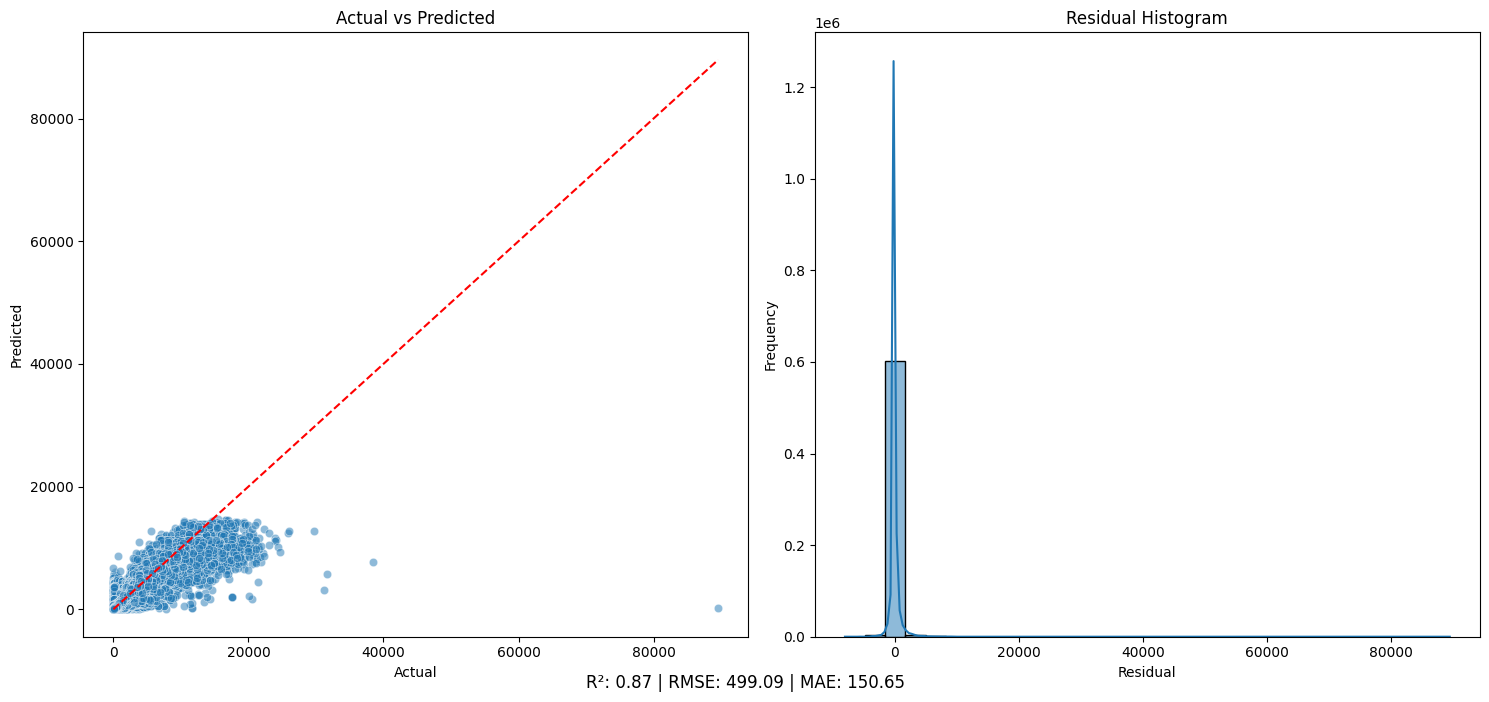

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate performance metrics
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

# Set up the figure
plt.figure(figsize=(15, 7))

# Actual vs Predicted plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_val, y=y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_val - y_pred
sns.histplot(residuals, bins=30, kde=True, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

# Display the performance metrics on the plot
plt.figtext(0.5, 0.01, f'R²: {r2:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()


***TESTING***

In [76]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


In [77]:
test.sample(3)

,id,date,store_nbr,family,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week,sales
8340,3009228,2017-08-20,42,24,0,3,3,2,0,0,48.59,8,2017,33,128.737060
10974,3011862,2017-08-22,17,18,8,18,2,12,0,0,47.65,8,2017,34,301.678912
12634,3013522,2017-08-23,13,28,0,10,2,15,0,0,48.45,8,2017,34,129.139982


In [78]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  int32         
 4   onpromotion  28512 non-null  int64         
 5   city         28512 non-null  int32         
 6   store_type   28512 non-null  int32         
 7   cluster      28512 non-null  int64         
 8   holiday      28512 non-null  int32         
 9   locale       28512 non-null  int32         
 10  dcoilwtico   28512 non-null  float64       
 11  month        28512 non-null  int32         
 12  year         28512 non-null  int32         
 13  week         28512 non-null  UInt32        
 14  sales        28512 non-null  float64       
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(7)

In [80]:
test.sample(3)

,id,date,store_nbr,family,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week,sales
20516,3021404,2017-08-27,34,23,0,8,1,6,0,0,47.65,8,2017,34,12.501353
1373,3002261,2017-08-16,47,20,16,18,0,14,0,0,46.80,8,2017,33,770.972251
21582,3022470,2017-08-28,15,0,1,9,2,15,0,0,46.40,8,2017,35,0.000000


In [81]:
test = pd.read_csv('test.csv', parse_dates=['date'])

In [82]:
test['date'] = pd.to_datetime(test['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
oil['date'] = pd.to_datetime(oil['date'])

In [83]:
test = test.merge(stores, on='store_nbr')
test = test.merge(holidays, on='date', how='left')
test = test.merge(oil, on='date', how='left')

In [84]:
test['dcoilwtico'].fillna(method='ffill', inplace=True)
test['transferred'].fillna(False, inplace=True)
test['onpromotion'].fillna(False, inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_22312\2705694713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['dcoilwtico'].fillna(method='ffill', inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_22312\2705694713.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test['dcoilwtico'].fillna(method='ffill', inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_22312\2705694713.py:2: FutureWarning: A value is trying to be

In [85]:
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['week'] = test['date'].dt.isocalendar().week

In [86]:
test = test.rename(columns={'type_x': 'store_type'})
test = test.rename(columns={'type_y': 'holiday'})

In [87]:
test.loc[(test['transferred'] == True) & (test['holiday'].isna()), 'holiday'] = 'holiday'

# Step 2: Change 'type' column to 1 for 'Holiday' and 0 otherwise
test['holiday'] = np.where(test['holiday'] == 'Holiday', 1, 0)

In [88]:
test.sample(1)

,id,date,store_nbr,family,onpromotion,city,state,store_type,cluster,holiday,locale,locale_name,description,transferred,dcoilwtico,month,year,week
26220,3027108,2017-08-30,44,HOME CARE,5,Quito,Pichincha,A,5,0,NaN,NaN,NaN,False,45.96,8,2017,35


In [89]:
# Map the 'locale' values to integers
locale_mapping = {'National': 3, 'Local': 1, 'Regional': 2, np.nan: 0}

# Replace the 'locale' column with the mapped values
test['locale'] = test['locale'].map(locale_mapping).fillna(0).astype(int)

In [90]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to the categorical columns
test['family'] = le.fit_transform(test['family'])
test['city'] = le.fit_transform(test['city'])
test['store_type'] = le.fit_transform(test['store_type'])

test = test.drop(columns=['transferred'])
test = test.drop(columns=['locale_name'])
test = test.drop(columns=['description'])
test = test.drop(columns=['state'])

In [91]:
X_train.sample(3)

,id,date,store_nbr,family,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week
1054844,1038806,2014-08-07,6,32,0,18,3,13,0,0,97.34,8,2014,32
1350969,1331367,2015-01-20,15,15,0,9,2,15,0,0,46.79,1,2015,4
612425,605297,2013-12-06,42,11,0,3,3,2,1,1,97.48,12,2013,49


In [92]:
test.sample(3)

,id,date,store_nbr,family,onpromotion,city,store_type,cluster,holiday,locale,dcoilwtico,month,year,week
10217,3011105,2017-08-21,45,20,0,18,0,11,0,0,47.39,8,2017,34
6218,3007106,2017-08-19,33,14,0,17,2,3,0,0,48.59,8,2017,33
16225,3017113,2017-08-25,14,22,0,19,2,7,0,0,47.65,8,2017,34


In [94]:
X_test = test[features]
test['sales'] = model.predict(X_test, num_iteration=model.best_iteration)

test['sales'] = np.maximum(test['sales'], 0)

submission = test[['id', 'sales']]
submission.to_csv('submission.csv', index=False)